In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyspark
import pyspark.sql.functions 

In [36]:
# read in data to pandas
fake = pd.read_csv('fake.csv')
news = pd.read_csv('true.csv')

In [37]:
news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [38]:
# check news for null values
news.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [39]:
# count the number of subjects in news
news['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [40]:
fake


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [41]:
# check for nulls in fake
fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [42]:
# count the subjects in fake
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [43]:
# create new columns in each to store the value of articles realness
news['is_fake'] = 0 # contains only news
fake['is_fake'] = 1 # contains only fakes

In [44]:
# merge them into one file, reset index, and shuffle up the data
data = pd.concat([news, fake])
data = data.reset_index()

In [45]:
data = data.sample(frac=1)

In [46]:
# check for duplicates in new data df
data.duplicated().sum()

0

In [47]:
data.head()

,index,title,text,subject,date,is_fake
11229,11229,California Governor Brown pushes big water pro...,"SACRAMENTO, Calif. (Reuters) - California Gove...",politicsNews,"January 14, 2016",0
14400,14400,Macron says not in French interests for German...,PARIS (Reuters) - President Emmanuel Macron sa...,worldnews,"November 20, 2017",0
5681,5681,Trump administration reviewing Cuba policy: Wh...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"February 3, 2017",0
43483,22066,FBI Agent Indicted In Killing of Lavoy Finicum...,21st Century Wire says Back in January of 2016...,US_News,"July 15, 2017",1
41636,20219,HILARIOUS! #BlackLivesMatter Protest Hillary A...,Pandering Hillary s getting a little karma Bla...,left-news,"Jul 26, 2016",1


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 11229 to 6559
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    44898 non-null  int64 
 1   title    44898 non-null  object
 2   text     44898 non-null  object
 3   subject  44898 non-null  object
 4   date     44898 non-null  object
 5   is_fake  44898 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [49]:
data['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [50]:
data['date'][0]

'December 31, 2017 '

In [51]:
# recast date to datetime format 
# data['date'] = pd.to_datetime(data['date'], format = '%B%d%Y')
# data.info()

In [52]:
data['date'].loc[(data['date'] == 'Nov 1, 2016')]

33952    Nov 1, 2016
41114    Nov 1, 2016
41117    Nov 1, 2016
33954    Nov 1, 2016
41112    Nov 1, 2016
41115    Nov 1, 2016
33957    Nov 1, 2016
41116    Nov 1, 2016
37747    Nov 1, 2016
33956    Nov 1, 2016
37748    Nov 1, 2016
33955    Nov 1, 2016
41111    Nov 1, 2016
33951    Nov 1, 2016
33953    Nov 1, 2016
41113    Nov 1, 2016
33960    Nov 1, 2016
33961    Nov 1, 2016
41119    Nov 1, 2016
41118    Nov 1, 2016
33950    Nov 1, 2016
33959    Nov 1, 2016
33958    Nov 1, 2016
Name: date, dtype: object

In [53]:
# data.to_csv (r'C:\Users\13195\OneDrive\Desktop\Final Project\Final-Project\export_dataframe.csv', header=True)

In [54]:
nodate_data = data.drop(['date', 'index', 'subject'], axis = 1)
nodate_data.reset_index(drop = True)
nodate_data.head()

,title,text,is_fake
11229,California Governor Brown pushes big water pro...,"SACRAMENTO, Calif. (Reuters) - California Gove...",0
14400,Macron says not in French interests for German...,PARIS (Reuters) - President Emmanuel Macron sa...,0
5681,Trump administration reviewing Cuba policy: Wh...,WASHINGTON (Reuters) - The Trump administratio...,0
43483,FBI Agent Indicted In Killing of Lavoy Finicum...,21st Century Wire says Back in January of 2016...,1
41636,HILARIOUS! #BlackLivesMatter Protest Hillary A...,Pandering Hillary s getting a little karma Bla...,1


In [55]:
# nodate_data.to_csv (r'C:\Users\13195\OneDrive\Desktop\Final Project\Final-Project\export_dataframe.csv', header=True)

array([[<AxesSubplot:title={'center':'is_fake'}>]], dtype=object)

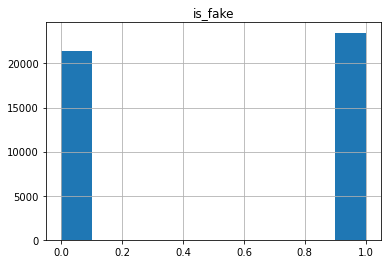

In [56]:
nodate_data.hist()

In [57]:
subdata = nodate_data[0:5000]
subdata.head()

,title,text,is_fake
11229,California Governor Brown pushes big water pro...,"SACRAMENTO, Calif. (Reuters) - California Gove...",0
14400,Macron says not in French interests for German...,PARIS (Reuters) - President Emmanuel Macron sa...,0
5681,Trump administration reviewing Cuba policy: Wh...,WASHINGTON (Reuters) - The Trump administratio...,0
43483,FBI Agent Indicted In Killing of Lavoy Finicum...,21st Century Wire says Back in January of 2016...,1
41636,HILARIOUS! #BlackLivesMatter Protest Hillary A...,Pandering Hillary s getting a little karma Bla...,1


In [58]:
X = subdata.iloc[:, :-1].values
X[0]

array(['California Governor Brown pushes big water project amid drought',
       'SACRAMENTO, Calif. (Reuters) - California Governor Jerry Brown warned on Thursday of near-apocalyptic water shortages if his $15 billion plan to divert water from a Northern California river for use elsewhere gets bogged down in political and environmental disputes. The plan to remove water north of the Sacramento-San Joaquin River Delta, the fragile source of much of the state’s drinking water, is opposed by many environmentalists, but Brown insisted it was crucial in shoring up water supplies in the drought-plagued state.  “If we don’t have the project, the delta will fail, water will not be available and\xa0California will suffer devastating economic consequences,” Brown, a Democrat, told a meeting of water regulators and utility executives in Sacramento to discuss the state’s progress in stabilizing its water system. The plan calls for digging a pair of tunnels under the delta. They would carry water 

In [59]:
y = subdata.iloc[:,-1].values
y[0]

0

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000)
mat_body = cv.fit_transform(X[:,1]).todense()

In [61]:
mat_body

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [62]:
cv_head = CountVectorizer(max_features=10000)
mat_head = cv_head.fit_transform(X[:,0]).todense()

In [63]:
mat_head

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
X_mat = np.hstack(( mat_head, mat_body))

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mat,y, test_size=0.2, random_state=42)

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[485,   3],
       [  5, 507]], dtype=int64)

In [68]:
(485+507)/(485+3+5+507)

0.992